In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

## Reduce years range


In [ ]:
import pandas as pd

# Load the csv file in a dataframe
df = pd.read_csv('/content/Human Development Index - Full.csv')

# Strings to match for column names
column_strings = ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']

# Get the column names that contain the specified strings
to_drop = [col for col in df.columns if any(string in col for string in column_strings)]

# Drop the columns
df.drop(to_drop, axis=1, inplace=True)

# Save the dataframe to a new csv file
df.to_csv('new_HDI_full.csv', index=False)

In [ ]:
print(df.columns)

Index(['ISO3', 'Country', 'Human Development Groups',
       'UNDP Developing Regions', 'HDI Rank (2021)',
       'Human Development Index (2011)', 'Human Development Index (2012)',
       'Human Development Index (2013)', 'Human Development Index (2014)',
       'Human Development Index (2015)',
       ...
       'Material footprint per capita (tonnes) (2012)',
       'Material footprint per capita (tonnes) (2013)',
       'Material footprint per capita (tonnes) (2014)',
       'Material footprint per capita (tonnes) (2015)',
       'Material footprint per capita (tonnes) (2016)',
       'Material footprint per capita (tonnes) (2017)',
       'Material footprint per capita (tonnes) (2018)',
       'Material footprint per capita (tonnes) (2019)',
       'Material footprint per capita (tonnes) (2020)',
       'Material footprint per capita (tonnes) (2021)'],
      dtype='object', length=349)


In [ ]:
print("AS Index =", len(df.columns)*len(df))

AS Index = 68055


# Data refining

## Remove all brackets and substitute blank spaces with underscores

In [ ]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/new_HDI_full.csv")

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(" ", "_")

# Remove all brackets from column names
df.columns = df.columns.str.replace("[()]", "", regex=True)

# Save the modified DataFrame to a new CSV file
df.to_csv("/content/HDI_full_3.csv", index=False)

## print all columns with year 2021

In [ ]:
# Specify the string to search for in the column names
search_string = "2021"

# Get a boolean mask indicating which column names contain the search string
mask = df.columns.str.contains(search_string)

# Use boolean indexing to select the column names that contain the search string
selected_columns = df.columns[mask].str.slice(stop=-4)

# Print the selected column names
print(selected_columns)

Index(['HDI_Rank_', 'Human_Development_Index_', 'Life_Expectancy_at_Birth_',
       'Expected_Years_of_Schooling_', 'Mean_Years_of_Schooling_',
       'Gross_National_Income_Per_Capita_', 'GDI_Group_',
       'Gender_Development_Index_', 'HDI_female_',
       'Life_Expectancy_at_Birth,_female_',
       'Expected_Years_of_Schooling,_female_',
       'Mean_Years_of_Schooling,_female_',
       'Gross_National_Income_Per_Capita,_female_', 'HDI_male_',
       'Life_Expectancy_at_Birth,_male_', 'Expected_Years_of_Schooling,_male_',
       'Mean_Years_of_Schooling,_male_',
       'Gross_National_Income_Per_Capita,_male_',
       'Inequality-adjusted_Human_Development_Index_',
       'Coefficient_of_human_inequality_', 'Overall_loss_%_',
       'Inequality_in_life_expectancy_', 'Inequality_in_eduation_',
       'Inequality_in_income_', 'GII_Rank_', 'Gender_Inequality_Index_',
       'Maternal_Mortality_Ratio_deaths_per_100,000_live_births_',
       'Adolescent_Birth_Rate_births_per_1,000_women

In [ ]:
indexes = ['HDI_Rank_', 'Human_Development_Index_', 'Life_Expectancy_at_Birth_',
       'Expected_Years_of_Schooling_', 'Mean_Years_of_Schooling_',
       'Gross_National_Income_Per_Capita_', 'Gender_Development_Index_',
       'HDI_female_', 'HDI_male_',
       'Inequality-adjusted_Human_Development_Index_',
       'Coefficient_of_human_inequality_', 'Overall_loss_%_',
       'Inequality_in_life_expectancy_', 'Inequality_in_eduation_',
       'Inequality_in_income_', 'GII_Rank_', 'Gender_Inequality_Index_']

year = 2021

# Iterate over the elements in the array
for i in indexes:
    print(i+str(year))

HDI_Rank_2021
Human_Development_Index_2021
Life_Expectancy_at_Birth_2021
Expected_Years_of_Schooling_2021
Mean_Years_of_Schooling_2021
Gross_National_Income_Per_Capita_2021
Gender_Development_Index_2021
HDI_female_2021
HDI_male_2021
Inequality-adjusted_Human_Development_Index_2021
Coefficient_of_human_inequality_2021
Overall_loss_%_2021
Inequality_in_life_expectancy_2021
Inequality_in_eduation_2021
Inequality_in_income_2021
GII_Rank_2021
Gender_Inequality_Index_2021


# Split db by year

In [ ]:
import pandas as pd

# Load the csv file in a dataframe
df = pd.read_csv('/content/HDI_full_3.csv')

indexes = ['Human_Development_Index', 'Life_Expectancy_at_Birth',
           'Expected_Years_of_Schooling', 'Mean_Years_of_Schooling',
           'Gross_National_Income_Per_Capita', 
           'Gender_Development_Index', 'HDI_female', 'HDI_male',
           'Inequality-adjusted_Human_Development_Index',
           'Coefficient_of_human_inequality', 'Overall_loss_%',
           'Inequality_in_life_expectancy', 'Inequality_in_eduation',
           'Inequality_in_income', 'Gender_Inequality_Index']

'Human_Development_Index_' = 'Life_Expectancy_at_Birth_' + 'Expected_Years_of_Schooling_' + 'Mean_Years_of_Schooling_' + 'Gross_National_Income_Per_Capita_' (+ 'Gender_Development_Index_',)
'Gender_Development_Index' = 'HDI_female_' + 'HDI_male_'
'Inequality-adjusted_Human_Development_Index_' = 'Coefficient_of_human_inequality_' + 'Overall_loss_%_' + 'Inequality_in_life_expectancy_' + 'Inequality_in_eduation_' + 'Inequality_in_income_' (+ 'Gender_Inequality_Index_')


to_remove = ['Coefficient_of_human_inequality_', 'Overall_loss_%_', 'HDI_female_', 'HDI_male_',]

indexes = ['Human_Development_Index_', 'Life_Expectancy_at_Birth_',
           'Expected_Years_of_Schooling_', 'Mean_Years_of_Schooling_',
           'Gross_National_Income_Per_Capita_',

           'Gender_Development_Index_', 'HDI_female_', 'HDI_male_',
           
           'Inequality-adjusted_Human_Development_Index_',   
           'Inequality_in_life_expectancy_', 'Inequality_in_eduation_',
           'Inequality_in_income_', 'Gender_Inequality_Index_']

           
data = [[i + str(j) for i in indexes] for j in range(2011, 2022)]

print(data)

folder_path = "/content/drive/MyDrive/VA/multidb/"
# Loop over the columns and write each DataFrame to a separate CSV file
for i, cols in enumerate(data):
    df_part = df[["ISO3","Country","Human_Development_Groups","UNDP_Developing_Regions","HDI_Rank_2021", "GII_Rank_2021"] + cols]
    df_part.to_csv(folder_path + f"data_{2011+i}.csv", index=False)

[['Human_Development_Index_2011', 'Life_Expectancy_at_Birth_2011', 'Expected_Years_of_Schooling_2011', 'Mean_Years_of_Schooling_2011', 'Gross_National_Income_Per_Capita_2011', 'Gender_Development_Index_2011', 'HDI_female_2011', 'HDI_male_2011', 'Inequality-adjusted_Human_Development_Index_2011', 'Coefficient_of_human_inequality_2011', 'Overall_loss_%_2011', 'Inequality_in_life_expectancy_2011', 'Inequality_in_eduation_2011', 'Inequality_in_income_2011', 'Gender_Inequality_Index_2011'], ['Human_Development_Index_2012', 'Life_Expectancy_at_Birth_2012', 'Expected_Years_of_Schooling_2012', 'Mean_Years_of_Schooling_2012', 'Gross_National_Income_Per_Capita_2012', 'Gender_Development_Index_2012', 'HDI_female_2012', 'HDI_male_2012', 'Inequality-adjusted_Human_Development_Index_2012', 'Coefficient_of_human_inequality_2012', 'Overall_loss_%_2012', 'Inequality_in_life_expectancy_2012', 'Inequality_in_eduation_2012', 'Inequality_in_income_2012', 'Gender_Inequality_Index_2012'], ['Human_Development

In [ ]:
import glob
import pandas as pd

# specify the path to the CSV files
path = "/content/drive/MyDrive/VA/multidb/*.csv"
substrings_to_remove = ['_2011','_2012','_2013','_2014','_2015','_2016','_2017','_2018','_2019','_2020','_2021']

# loop over all CSV files in the path
for file in glob.glob(path):
    # read the CSV file into a pandas DataFrame
    df = pd.read_csv(file)

    # Remove the specified substrings from the column names
    for substring in substrings_to_remove:
        df.columns = df.columns.str.replace(substring, '')
    
    # save the modified DataFrame back to the original CSV file
    df.to_csv(file, index=False)

<ipython-input-124-d0c59f474acc>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


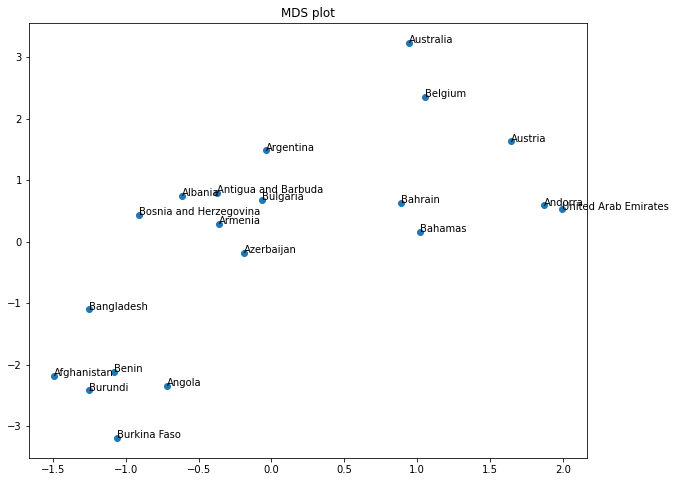

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.manifold import TSNE


# Load data from CSV file
data = pd.read_csv('/content/drive/MyDrive/VA/multidb/data_2011.csv')

data = data.head(20)

# Replace NaN values with column means
data = data.fillna(data.mean())

# Extract variables to use in MDS analysis
X = data[['Life_Expectancy_at_Birth', 'Expected_Years_of_Schooling', 'Mean_Years_of_Schooling',
          'Gross_National_Income_Per_Capita']]

# Scale the data
std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X) 

# Compute MDS embedding
mds = MDS(n_components=2, dissimilarity='euclidean')
X_mds = mds.fit_transform(X)

# Get the first column of the dataset
labels = data.iloc[:, 1].values

# Plot MDS results
plt.figure(figsize=(10, 8))
plt.scatter(X_mds[:, 0], X_mds[:, 1])
for i, label in enumerate(labels):
    plt.annotate(label, (X_mds[i, 0], X_mds[i, 1]))
plt.title('MDS plot')
plt.show() 


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/VA/countryContinent.csv')

# Keep only the "country" and "continent" columns
df = df[['country', 'continent']]

# Save the new CSV file
df.to_csv('country_continent.csv', index=False)


UnicodeDecodeError: ignored

In [ ]:
import pandas as pd

# Define the list of continent values
continent_list = ['Asia', 'Africa', 'Europe', 'Europe', 'Asia', 'South America', 'Asia', 'North America', 'Oceania', 'Europe', 'Asia', 'Africa', 'Europe', 'Africa', 'Africa', 'Asia', 'Europe', 'Asia', 'North America', 'Europe', 'Europe', 'North America', 'South America', 'South America', 'Asia', 'Asia', 'Africa', 'Africa', 'North America', 'Europe', 'South America', 'Asia', 'Africa', 'Africa', 'South America', 'Africa', 'Africa', 'North America', 'North America', 'Africa', 'Africa', 'Europe', 'Europe', 'North America', 'Africa', 'South America', 'Asia', 'Africa', 'Africa', 'Europe', 'Europe', 'Africa', 'Europe', 'Oceania', 'Europe', 'North America', 'Asia', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Europe', 'North America', 'Europe', 'Europe', 'Africa', 'Europe', 'Africa', 'Europe', 'Oceania', 'Europe', 'Africa', 'Europe', 'Europe', 'North America', 'South America', 'Asia', 'Central America', 'Europe', 'Asia', 'Europe', 'South America', 'North America', 'Africa', 'South America', 'Asia', 'Asia', 'Europe', 'Asia', 'Europe', 'North America', 'Asia', 'Europe', 'Europe', 'Asia', 'Asia', 'Europe', 'North America', 'Asia', 'Asia', 'Europe', 'Europe', 'North America', 'Oceania', 'Europe', 'Africa', 'Asia', 'North America', 'Europe', 'Africa', 'Africa', 'Africa', 'Oceania', 'Africa', 'Europe', 'Asia', 'Europe', 'Asia', 'Africa', 'Africa', 'North America', 'Europe', 'Asia', 'Europe', 'Africa', 'Europe', 'Oceania', 'Asia', 'Africa', 'Europe', 'Europe', 'Africa', 'Asia', 'North America', 'Europe', 'Oceania', 'Asia', 'Asia', 'Africa', 'Africa', 'Africa', 'Asia', 'Asia', 'Oceania', 'Asia', 'Europe', 'North America', 'Asia', 'South America', 'Asia', 'Europe', 'Africa', 'Africa', 'South America', 'Europe', 'Africa', 'Asia', 'Africa', 'Asia', 'Africa', 'Europe', 'Africa', 'North America', 'Asia', 'North America', 'Europe', 'Oceania', 'North America', 'South America', 'Oceania', 'Africa', 'Africa']

# Create a new column 'Continent' with the continent_list values
x_mds['Continent'] = continent_list

# View the updated DataFrame
print(x_mds.head())


['Afghanistan' 'Angola' 'Albania' 'Andorra' 'United Arab Emirates'
 'Argentina' 'Armenia' 'Antigua and Barbuda' 'Australia' 'Austria'
 'Azerbaijan' 'Burundi' 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh'
 'Bulgaria' 'Bahrain' 'Bahamas' 'Bosnia and Herzegovina' 'Belarus'
 'Belize' 'Bolivia' 'Brazil' 'Barbados' 'Brunei' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Switzerland' 'Chile' 'China'
 'Ivory Coast' 'Cameroon' 'The Democratic Republic of the Congo' 'Congo'
 'Colombia' 'Comoros' 'Cabo Verde' 'Costa Rica' 'Cuba' 'Cyprus' 'Czechia'
 'Germany' 'Djibouti' 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria'
 'Ecuador' 'Egypt' 'Eritrea' 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji'
 'France' 'Micronesia' 'Gabon' 'United Kingdom' 'Georgia' 'Ghana' 'Guinea'
 'Gambia' 'Guinea-Bissau' 'Equatorial Guinea' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hong Kong' 'Honduras' 'Croatia' 'Haiti' 'Hungary'
 'Indonesia' 'India' 'Ireland' 'Iran' 'Iraq' 'Iceland' 'Israel' 'Italy'
 'Jamaica' '

In [ ]:
!pip install pycountry-convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 49.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.8/227.8 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 KB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.8/316.8 KB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 KB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 KB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 KB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 KB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# add column with continents in mds results

In [ ]:
import pandas as pd
from pycountry_convert import country_alpha2_to_continent_code, country_alpha3_to_country_alpha2, country_name_to_country_alpha3

# read the csv file into a pandas dataframe
df = pd.read_csv('MDS_results.csv')

# create a list to store the continent names
continents = []

# loop through the countries in the dataframe
for country in df['country']:
    try:
        # get the country's alpha-3 code
        country_code = country_name_to_country_alpha3(country)
        # get the country's alpha-2 code from the alpha-3 code
        country_code_alpha2 = country_alpha3_to_country_alpha2(country_code)
        # get the continent code from the alpha-2 code
        continent_code = country_alpha2_to_continent_code(country_code_alpha2)
        # append the continent name to the list
        continents.append(continent_code)
    except:
        # if the country name is not valid, append NaN to the list
        continents.append("NaN")

# add the continents list as a new column to the dataframe
df['continent'] = continents

# replace the values in the continent column
df['continent'] = df['continent'].replace({'AS': 'Asia', 'AF': 'Africa', 'EU': 'Europe', 'SA': 'South America', 'NA': 'North America', 'OC': 'Oceania'})

# save the updated dataframe to a new csv file
df.to_csv('MDS_results_with_continent.csv', index=False)

# MDS

<ipython-input-141-999949ed5d01>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


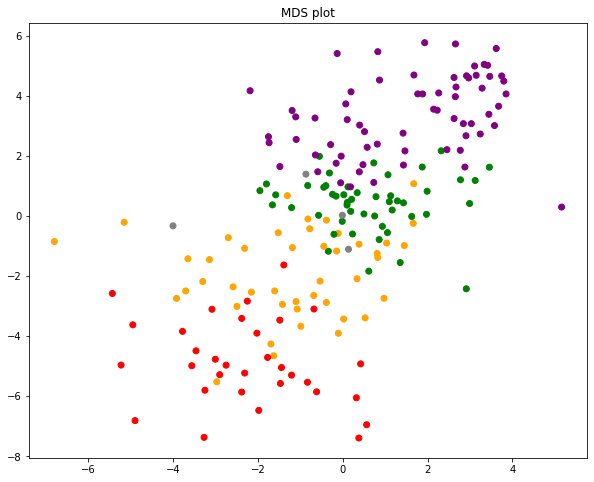

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

year = 2011

# Load data from CSV file
data = pd.read_csv(f'/content/drive/MyDrive/VA/multidb/data_{year}.csv')

# Replace NaN values with column means
data = data.fillna(data.mean())

# Extract variables to use in MDS analysis
hdi = data[['Life_Expectancy_at_Birth',
           'Expected_Years_of_Schooling', 'Mean_Years_of_Schooling',
           'Gross_National_Income_Per_Capita']]

gdi= data[['HDI_female', 'HDI_male']]

i_hdi = data[['Coefficient_of_human_inequality', 'Overall_loss_%',
           'Inequality_in_life_expectancy', 'Inequality_in_eduation',
           'Inequality_in_income', 'Gender_Inequality_Index']]

all = data[['Human_Development_Index', 'Life_Expectancy_at_Birth',
           'Expected_Years_of_Schooling', 'Mean_Years_of_Schooling',
           'Gross_National_Income_Per_Capita', 
           'Gender_Development_Index', 'HDI_female', 'HDI_male',
           'Inequality-adjusted_Human_Development_Index',
           'Coefficient_of_human_inequality', 'Overall_loss_%',
           'Inequality_in_life_expectancy', 'Inequality_in_eduation',
           'Inequality_in_income', 'Gender_Inequality_Index']]

all_no_compose = data[['Life_Expectancy_at_Birth',
           'Expected_Years_of_Schooling', 'Mean_Years_of_Schooling',
           'Gross_National_Income_Per_Capita', 'HDI_female', 'HDI_male',
           'Coefficient_of_human_inequality', 'Overall_loss_%',
           'Inequality_in_life_expectancy', 'Inequality_in_eduation',
           'Inequality_in_income']]

X = all

# Scale the data
std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X) 

# Compute MDS embedding
mds = MDS(n_components=2, dissimilarity='euclidean')
X_mds = mds.fit_transform(X)

# Save DataFrame to CSV file
df.to_csv(f'MDS_results_{year}.csv', index=False)

# Define color map
color_map = {
    'Low': 'red',
    'Medium': 'orange',
    'High': 'green',
    'Very High': 'purple',
    'Nan': 'grey'
}

# Get the human development groups from the data
groups = data['Human_Development_Groups'].fillna('Nan')

# Get the corresponding color for each group
colors = [color_map[group] for group in groups]

# Get the first column of the dataset
labels = data.iloc[:, 1].values

# Plot MDS results
plt.figure(figsize=(10, 8))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=colors)
#for i, label in enumerate(labels):
    #plt.annotate(label, (X_mds[i, 0], X_mds[i, 1]))
plt.title('MDS plot')
plt.show()


# MDS + Continents + Popluation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

year = 2015

# Load data from CSV file
data = pd.read_csv(f'/content/drive/MyDrive/VA/multidb/data_{year}.csv')

# Replace NaN values with column means
data = data.fillna(data.mean())

# Extract variables to use in MDS analysis
hdi = data[['Life_Expectancy_at_Birth',
           'Expected_Years_of_Schooling', 'Mean_Years_of_Schooling',
           'Gross_National_Income_Per_Capita']]

gdi= data[['HDI_female', 'HDI_male']]

i_hdi = data[['Coefficient_of_human_inequality', 'Overall_loss_%',
           'Inequality_in_life_expectancy', 'Inequality_in_eduation',
           'Inequality_in_income', 'Gender_Inequality_Index']]

all = data[['Human_Development_Index', 'Life_Expectancy_at_Birth',
           'Expected_Years_of_Schooling', 'Mean_Years_of_Schooling',
           'Gross_National_Income_Per_Capita', 
           'Gender_Development_Index', 'HDI_female', 'HDI_male',
           'Inequality-adjusted_Human_Development_Index',
           'Coefficient_of_human_inequality', 'Overall_loss_%',
           'Inequality_in_life_expectancy', 'Inequality_in_eduation',
           'Inequality_in_income', 'Gender_Inequality_Index']]

all_no_compose = data[['Life_Expectancy_at_Birth',
           'Expected_Years_of_Schooling', 'Mean_Years_of_Schooling',
           'Gross_National_Income_Per_Capita', 'HDI_female', 'HDI_male',
           'Inequality_in_life_expectancy', 'Inequality_in_eduation',
           'Inequality_in_income']]

X = all_no_compose

# Scale the data
std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X) 

# Compute MDS embedding
mds = MDS(n_components=2, dissimilarity='euclidean')
X_mds = mds.fit_transform(X)

# Create a DataFrame with the MDS results
mds_results = pd.DataFrame(X_mds, columns=['first', 'second'])

# Concatenate the original data with the MDS results
result = pd.concat([data, mds_results], axis=1)

# Save DataFrame to CSV file
result.to_csv(f'all_data_and_MDS_results_{year}.csv', index=False)


<ipython-input-111-c0afe743e02b>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


In [ ]:
import pandas as pd
from pycountry_convert import country_alpha2_to_continent_code, country_alpha3_to_country_alpha2, country_name_to_country_alpha3

# read the csv file into a pandas dataframe
df = pd.read_csv(f'all_data_and_MDS_results_{year}.csv')

# create a list to store the continent names
continents = []

# loop through the countries in the dataframe
for country in df['Country']:
    try:
        # get the country's alpha-3 code
        country_code = country_name_to_country_alpha3(country)
        # get the country's alpha-2 code from the alpha-3 code
        country_code_alpha2 = country_alpha3_to_country_alpha2(country_code)
        # get the continent code from the alpha-2 code
        continent_code = country_alpha2_to_continent_code(country_code_alpha2)
        # append the continent name to the list
        continents.append(continent_code)
    except:
        # if the country name is not valid, append NaN to the list
        continents.append("Asia")

# add the continents list as a new column to the dataframe
df['continent'] = continents

# replace the values in the continent column
df['continent'] = df['continent'].replace({'AS': 'Asia', 'AF': 'Africa', 'EU': 'Europe', 'SA': 'South America', 'NA': 'North America', 'OC': 'Oceania'})

# save the updated dataframe to a new csv file
df.to_csv(f'new_data/data_{year}.csv', index=False)

In [ ]:
population = pd.read_csv("/content/drive/MyDrive/VA/population_by_country_2020.csv")
data = df.merge(population, on="Country")
data.to_csv(f"data_with_pop/data_{year}.csv", index=False)

In [ ]:
!zip -r data_with_pop.zip /content/data_with_pop

  adding: content/data_with_pop/ (stored 0%)
  adding: content/data_with_pop/data_2011_with_population.csv (deflated 56%)
  adding: content/data_with_pop/data_2017_with_population.csv (deflated 55%)
  adding: content/data_with_pop/data_2018_with_population.csv (deflated 54%)
  adding: content/data_with_pop/data_2014_with_population.csv (deflated 55%)
  adding: content/data_with_pop/data_2019_with_population.csv (deflated 54%)
  adding: content/data_with_pop/data_2013_with_population.csv (deflated 55%)
  adding: content/data_with_pop/data_2021_with_population.csv (deflated 54%)
  adding: content/data_with_pop/data_2016_with_population.csv (deflated 55%)
  adding: content/data_with_pop/data_2012_with_population.csv (deflated 55%)
  adding: content/data_with_pop/data_2020_with_population.csv (deflated 54%)
